## Lending Club dataset

### Exploratory Data Analysis

Data Types<br>
Features<br>
Outliers<br>
Volume by State<br>
Loan Status and Loan Purpose<br>
Heatmapc(all variables)


In [1]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv('./Data/LCdataset_cleaned80_254794.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
1,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
2,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
3,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
4,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,1 year,RENT,62000.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0
254790,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,10+ years,MORTGAGE,80000.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0
254791,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
254792,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0


In [3]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 80, dtype: int64

The above **df.info()** shows a number of columns that are still an object. Some of these elements would have to get binarized (i.e. application_type, empl_length), some would have to be converted to a numeric data type (i.e. int_rate and revol_util). 

From Data Dictionary: <br>
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. <br>
int_rate: Interest Rate on the loan

#### Convert to float: int_rate and revol_util

In [4]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [5]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [6]:
df['initial_list_status'].value_counts(dropna=False)

w    237729
f     17065
Name: initial_list_status, dtype: int64

#### Column: term

In [7]:
df['term'].value_counts(normalize=True).to_frame()

,term
36 months,0.659368
60 months,0.340632


In [8]:
df['term'].value_counts(normalize=True) 

 36 months    0.659368
 60 months    0.340632
Name: term, dtype: float64

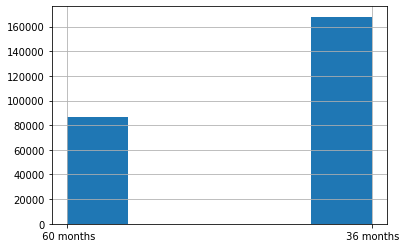

In [9]:
df['term'].hist(bins=5);

#### More columns to convert: grade, subgrade

In [10]:
df['grade'].value_counts(dropna=False)

A    78850
B    74740
C    59542
D    41662
Name: grade, dtype: int64

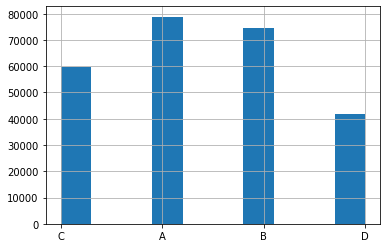

In [11]:
df['grade'].hist();

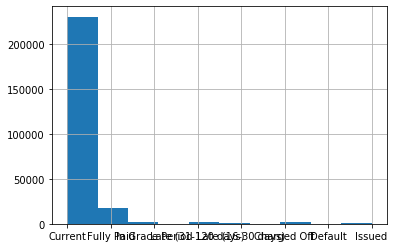

In [12]:
df['loan_status'].hist();

In [13]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_b

In [14]:
df['issue_d'].value_counts()

Jul-2019    33912
Aug-2019    31881
Oct-2019    30670
Sep-2019    30242
Jan-2020    29037
Dec-2019    28781
Nov-2019    26937
Feb-2020    24241
Mar-2020    19093
Name: issue_d, dtype: int64

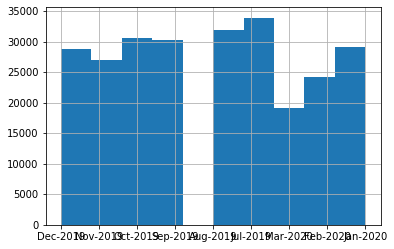

In [15]:
df['issue_d'].hist();

In [16]:
df['loan_amnt'].sum()

4208108575.0

In [17]:
df.groupby('loan_status')['grade'].value_counts()

loan_status         grade
Charged Off         D          692
                    C          604
                    B          443
                    A          212
Current             A        72939
                    B        68206
                    C        53425
                    D        36002
Default             C           12
                    D            5
                    A            3
                    B            2
Fully Paid          A         5074
                    B         5046
                    C         4158
                    D         3657
In Grace Period     C          459
                    D          422
                    B          393
                    A          272
Issued              B          102
                    A           96
                    C           87
                    D           80
Late (16-30 days)   C          132
                    D          105
                    B          101
                    A        

In [18]:
df.groupby('loan_status')['int_rate'].mean().to_frame()

,int_rate
loan_status,
Charged Off,16.629462
Current,13.088261
Default,16.508182
Fully Paid,13.766111
In Grace Period,15.312555
Issued,14.153945
Late (16-30 days),15.653829
Late (31-120 days),16.709277


In [19]:
df.groupby('loan_status')['loan_amnt'].mean().to_frame()

,loan_amnt
loan_status,
Charged Off,16631.714505
Current,16693.961322
Default,16550.000000
Fully Paid,14040.557569
In Grace Period,17788.567270
Issued,20069.520548
Late (16-30 days),16106.989924
Late (31-120 days),16499.289631


In [20]:
df.groupby('purpose')['loan_amnt'].mean().to_frame()

,loan_amnt
purpose,
car,10814.127219
credit_card,16378.404424
debt_consolidation,17814.577512
home_improvement,15058.834147
house,16145.007603
major_purchase,12555.931449
medical,9715.154474
moving,9272.546648
other,11197.921704


In [21]:
df.groupby('purpose')['loan_amnt'].mean().to_frame()

,loan_amnt
purpose,
car,10814.127219
credit_card,16378.404424
debt_consolidation,17814.577512
home_improvement,15058.834147
house,16145.007603
major_purchase,12555.931449
medical,9715.154474
moving,9272.546648
other,11197.921704


In [22]:
df.groupby('grade')['int_rate'].mean().to_frame()

,int_rate
grade,
A,7.758066
B,11.785333
C,16.080201
D,21.987787


In [23]:
df.groupby('grade')['loan_amnt'].sum().to_frame()

,loan_amnt
grade,
A,1.307484e+09
B,1.304499e+09
C,9.538562e+08
D,6.422702e+08


In [24]:
df.groupby('addr_state')['loan_status'].value_counts().to_frame()

loan_status
addr_state loan_status                    
AK         Current                     493
           Fully Paid                   34
           In Grace Period               6
           Charged Off                   3
           Late (16-30 days)             2
...                                    ...
WY         Fully Paid                   40
           Charged Off                   4
           In Grace Period               4
           Issued                        1
           Late (31-120 days)            1

[346 rows x 1 columns]

In [25]:
df['addr_state'].value_counts(normalize=True)

CA    0.131828
TX    0.088260
FL    0.072156
NY    0.071968
IL    0.041084
NJ    0.037332
OH    0.034035
GA    0.033337
PA    0.033325
VA    0.027100
NC    0.026484
MI    0.026249
MA    0.024765
AZ    0.024349
MD    0.023945
WA    0.021394
IN    0.017787
MN    0.017371
TN    0.017022
CT    0.016927
MO    0.016621
CO    0.015499
NV    0.014400
WI    0.014106
SC    0.012489
OR    0.012139
AL    0.011327
LA    0.010267
KY    0.010122
OK    0.009667
KS    0.008426
AR    0.007987
UT    0.006919
MS    0.006495
WV    0.005879
NH    0.005408
NE    0.005271
RI    0.004945
NM    0.004941
HI    0.004207
ID    0.003736
ME    0.003536
DE    0.003038
MT    0.002838
VT    0.002555
ND    0.002284
AK    0.002115
WY    0.002100
SD    0.001986
DC    0.001978
Name: addr_state, dtype: float64

In [26]:
df_DC = df[(df['addr_state'] =='DC')] 

In [27]:
df_DC['loan_status'].value_counts()

Current               456
Fully Paid             37
Charged Off             5
In Grace Period         3
Late (31-120 days)      2
Late (16-30 days)       1
Name: loan_status, dtype: int64

In [28]:
df_DC['loan_status'].value_counts(normalize=True)

Current               0.904762
Fully Paid            0.073413
Charged Off           0.009921
In Grace Period       0.005952
Late (31-120 days)    0.003968
Late (16-30 days)     0.001984
Name: loan_status, dtype: float64

In [29]:
df['loan_status'].value_counts(normalize=True).to_frame()

,loan_status
Current,0.904935
Fully Paid,0.070390
Late (31-120 days),0.007873
Charged Off,0.007657
In Grace Period,0.006068
Late (16-30 days),0.001558
Issued,0.001433
Default,0.000086


In [30]:
df.shape

(254794, 80)

In [31]:
df_current = df[(df['loan_status'] =='Current')] 

In [32]:
df_current.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,230572.000000,230572.000000,230572.000000,2.305720e+05,230572.000000,230572.000000,230572.000000,230572.000000,230572.000000,230572.000000,...,230572.000000,230572.000000,230572.000000,230572.000000,230572.000000,230572.0,2.305720e+05,2.305720e+05,230572.000000,2.305720e+05
mean,16693.961322,13.088261,480.064966,9.100517e+04,21.785209,0.226367,705.904186,709.904247,0.573656,12.816435,...,0.053771,2.310415,94.936713,31.793648,0.102012,0.0,2.134131e+05,6.531330e+04,30824.290972,5.938941e+04
std,10204.096861,5.107731,285.684153,1.034471e+05,13.358110,0.738933,34.531904,34.532150,0.807567,6.123391,...,0.393198,1.916684,8.541478,33.634779,0.308329,0.0,1.966959e+05,5.917636e+04,27750.292753,5.237257e+04
min,1000.000000,6.000000,30.640000,1.400000e+01,0.000000,0.000000,660.000000,664.000000,0.000000,2.000000,...,0.000000,0.000000,9.100000,0.000000,0.000000,0.0,1.945000e+03,1.660000e+02,100.000000,3.530000e+02
25%,9000.000000,8.810000,267.250000,5.400000e+04,14.530000,0.000000,680.000000,684.000000,0.000000,9.000000,...,0.000000,1.000000,92.900000,0.000000,0.000000,0.0,6.893950e+04,2.892400e+04,12100.000000,2.519900e+04
50%,15000.000000,12.400000,407.350000,7.500000e+04,20.400000,0.000000,700.000000,704.000000,0.000000,12.000000,...,0.000000,2.000000,100.000000,23.100000,0.000000,0.0,1.467050e+05,4.895350e+04,23000.000000,4.577350e+04
75%,24000.000000,16.120000,644.570000,1.065660e+05,27.230000,0.000000,725.000000,729.000000,1.000000,16.000000,...,0.000000,3.000000,100.000000,50.000000,0.000000,0.0,3.069820e+05,8.181700e+04,40500.000000,7.684725e+04
max,40000.000000,30.990000,1671.880000,9.999999e+06,999.000000,22.000000,845.000000,850.000000,5.000000,104.000000,...,20.000000,26.000000,100.000000,100.000000,7.000000,0.0,5.070345e+06,2.385357e+06,788200.000000,2.030436e+06


In [33]:
df_current['addr_state'].value_counts(normalize=True)

CA    0.131078
TX    0.088389
NY    0.072355
FL    0.071965
IL    0.041675
NJ    0.037567
OH    0.034631
GA    0.033421
PA    0.033348
VA    0.027172
NC    0.026374
MI    0.026326
MA    0.024634
AZ    0.023962
MD    0.023880
WA    0.021048
IN    0.017864
MN    0.017248
CT    0.017071
TN    0.017010
MO    0.016706
CO    0.015492
NV    0.014108
WI    0.014043
SC    0.012491
OR    0.012096
AL    0.011307
LA    0.010283
KY    0.010231
OK    0.009685
KS    0.008527
AR    0.008002
MS    0.006614
UT    0.006610
WV    0.005890
NH    0.005404
NE    0.005291
RI    0.004966
NM    0.004953
HI    0.004172
ID    0.003643
ME    0.003582
DE    0.003006
MT    0.002845
VT    0.002568
ND    0.002268
AK    0.002138
WY    0.002103
SD    0.001982
DC    0.001978
Name: addr_state, dtype: float64

In [34]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,254794.000000,254794.000000,254794.000000,2.547940e+05,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,...,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.0,2.547940e+05,2.547940e+05,254794.000000,2.547940e+05
mean,16515.728687,13.210915,476.803128,9.120849e+04,21.668758,0.227211,706.129265,710.129324,0.585771,12.802644,...,0.054287,2.350726,94.948394,31.450851,0.103276,0.0,2.142978e+05,6.520418e+04,30782.469046,5.932248e+04
std,10193.502454,5.171272,286.261923,1.056252e+05,13.326421,0.743560,34.702704,34.702941,0.817635,6.116018,...,0.398773,1.938766,8.519563,33.601958,0.309967,0.0,1.973281e+05,5.907875e+04,27813.369324,5.227234e+04
min,1000.000000,6.000000,30.640000,1.400000e+01,0.000000,0.000000,660.000000,664.000000,0.000000,2.000000,...,0.000000,0.000000,9.100000,0.000000,0.000000,0.0,1.945000e+03,5.200000e+01,100.000000,4.900000e+01
25%,8581.250000,8.810000,264.130000,5.408000e+04,14.400000,0.000000,680.000000,684.000000,0.000000,8.000000,...,0.000000,1.000000,92.900000,0.000000,0.000000,0.0,6.928825e+04,2.885700e+04,12000.000000,2.517100e+04
50%,15000.000000,12.400000,404.050000,7.500000e+04,20.290000,0.000000,700.000000,704.000000,0.000000,12.000000,...,0.000000,2.000000,100.000000,22.200000,0.000000,0.0,1.480910e+05,4.885350e+04,22900.000000,4.571200e+04
75%,23250.000000,16.950000,642.300000,1.070000e+05,27.120000,0.000000,725.000000,729.000000,1.000000,16.000000,...,0.000000,3.000000,100.000000,50.000000,0.000000,0.0,3.081790e+05,8.168200e+04,40500.000000,7.678275e+04
max,40000.000000,30.990000,1671.880000,9.999999e+06,999.000000,22.000000,845.000000,850.000000,5.000000,104.000000,...,20.000000,26.000000,100.000000,100.000000,7.000000,0.0,5.070345e+06,2.385357e+06,788200.000000,2.030436e+06


In [35]:
df.shape

(254794, 80)

In [36]:
df['loan_amnt'].sum()

4208108575.0

In [37]:
df_current['addr_state'].value_counts(normalize=True).sort_values(ascending=False).to_frame()

,addr_state
CA,0.131078
TX,0.088389
NY,0.072355
FL,0.071965
IL,0.041675
NJ,0.037567
OH,0.034631
GA,0.033421
PA,0.033348
VA,0.027172


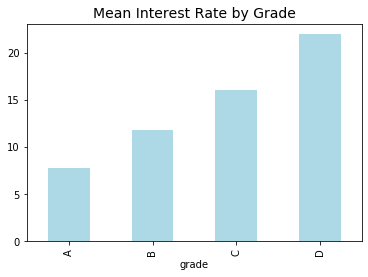

In [146]:
df.groupby('grade')['int_rate'].mean().plot(kind='bar', color='lightblue')
plt.title('Mean Interest Rate by Grade', fontsize=14)

plt.savefig('InterestByGrade.png');

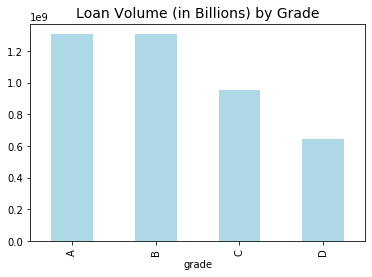

In [147]:
df.groupby('grade')['loan_amnt'].sum().plot(kind='bar', color='lightblue')
plt.title('Loan Volume (in Billions) by Grade', fontsize=14)

plt.savefig('VolumebyGrade.png');

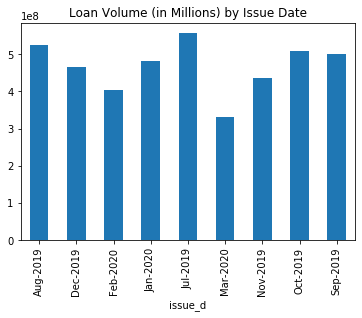

In [101]:
df.groupby('issue_d')['loan_amnt'].sum().plot(kind='bar')

plt.title('Loan Volume (in Millions) by Issue Date');

In [100]:
df['loan_amnt'].sum()

4208088575.0

In [40]:
df.groupby(['addr_state']).mean()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
addr_state,,,,,,,,,,,,,,,,,,,,,
AK,17797.773655,14.023581,525.238256,90959.871837,22.389035,0.222635,701.790353,705.790353,0.439703,11.517625,...,0.057514,2.204082,94.614657,40.525974,0.040816,0.0,250418.181818,69061.782931,29049.721707,62562.855288
AL,16313.028413,13.918704,464.113808,84399.432488,24.023621,0.251559,704.859667,708.859667,0.592169,12.672211,...,0.056480,2.468815,94.928863,34.303430,0.107069,0.0,208334.510742,68683.545738,26879.175329,64951.400554
AR,15388.108108,13.788295,441.549489,79523.824732,24.263106,0.235381,706.498771,710.498771,0.686486,12.147912,...,0.059951,2.232924,94.733612,33.723636,0.081572,0.0,188471.608354,66043.094349,26288.894349,63999.074201
AZ,15972.691006,13.228187,460.429231,87323.537808,22.105559,0.184720,704.877498,708.877498,0.547711,12.439555,...,0.047550,2.387008,95.374742,30.536896,0.150226,0.0,220708.181173,65441.100258,29950.741457,60644.864765
CA,16944.889696,13.285793,496.396950,99556.426261,19.923930,0.191074,705.524279,709.524309,0.540415,12.486707,...,0.040936,2.285242,95.248882,31.288330,0.125368,0.0,222405.646402,61914.259460,32238.134508,55330.053946
CO,16898.037478,11.115290,469.116470,93381.386809,20.209319,0.175487,710.454545,714.454545,0.692327,12.849076,...,0.031654,2.688782,95.366852,24.708205,0.141555,0.0,267393.188149,70274.527982,33675.841985,62811.760192
CT,16849.646418,13.374368,486.618593,100983.383761,20.660707,0.295850,705.745421,709.745421,0.575238,13.143288,...,0.065847,2.253884,93.901507,31.888917,0.101090,0.0,229856.077440,64280.576861,33601.136100,56892.991421
DC,17343.204365,13.703075,519.360794,118012.454821,18.792044,0.238095,704.097222,708.097222,0.599206,12.952381,...,0.065476,2.196429,94.270833,33.356746,0.047619,0.0,250307.656746,91621.051587,35687.500000,77815.952381
DE,16599.838501,12.886447,468.464690,90060.341835,21.705000,0.214470,705.271318,709.271318,0.679587,12.949612,...,0.059432,2.284238,94.742506,32.151550,0.111111,0.0,240207.788114,65186.724806,31452.713178,61324.086563


In [41]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).to_frame()

loan_status
addr_state loan_status                    
AK         Current                0.914657
           Fully Paid             0.063080
           In Grace Period        0.011132
           Charged Off            0.005566
           Late (16-30 days)      0.003711
...                                    ...
WY         Fully Paid             0.074766
           Charged Off            0.007477
           In Grace Period        0.007477
           Issued                 0.001869
           Late (31-120 days)     0.001869

[346 rows x 1 columns]

In [42]:
df.groupby('grade')['addr_state'].value_counts()

grade  addr_state
A      CA            10560
       TX             6978
       NY             6108
       FL             5558
       IL             3510
                     ...  
D      VT              108
       DC               97
       WY               96
       SD               88
       CO               20
Name: addr_state, Length: 200, dtype: int64

In [171]:
df_late = df[(df['loan_status']=='Charged Off') | (df['loan_status']=='Late (31-120 days)') | (df['loan_status']=='Late (16-30 days)') | (df['loan_status']=='Default')]
df_late

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
66,15000.0,60 months,28.80,474.31,D,D5,1 year,MORTGAGE,105000.0,Not Verified,...,0.0,3.0,83.3,33.3,0.0,0.0,503980.0,56886.0,21600.0,58580.0
134,10000.0,36 months,8.81,317.12,A,A5,1 year,RENT,90000.0,Not Verified,...,0.0,1.0,100.0,71.4,0.0,0.0,81902.0,62070.0,12200.0,67102.0
322,16000.0,36 months,18.62,583.43,D,D1,2 years,RENT,125000.0,Not Verified,...,0.0,2.0,100.0,55.6,0.0,0.0,130302.0,75419.0,84500.0,45802.0
589,10000.0,36 months,20.55,374.45,D,D2,4 years,OWN,66000.0,Verified,...,2.0,5.0,100.0,0.0,1.0,0.0,87769.0,19669.0,37700.0,48569.0
638,25875.0,36 months,13.08,872.83,B,B5,< 1 year,MORTGAGE,240000.0,Source Verified,...,0.0,3.0,100.0,0.0,1.0,0.0,684207.0,621067.0,191000.0,405707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253936,16000.0,60 months,23.05,451.51,D,D3,4 years,OWN,79000.0,Source Verified,...,0.0,4.0,100.0,0.0,0.0,0.0,40061.0,18532.0,23500.0,10661.0
253962,25000.0,36 months,20.55,936.12,D,D2,4 years,RENT,102000.0,Verified,...,0.0,4.0,100.0,0.0,0.0,0.0,54538.0,10522.0,31600.0,22938.0
254297,20000.0,60 months,20.55,536.02,D,D2,4 years,MORTGAGE,130000.0,Source Verified,...,0.0,3.0,85.7,50.0,0.0,0.0,204750.0,30304.0,7500.0,39596.0
254334,4800.0,36 months,23.05,185.94,D,D3,9 years,MORTGAGE,45000.0,Not Verified,...,0.0,3.0,88.9,66.7,1.0,0.0,137250.0,51160.0,3100.0,53555.0


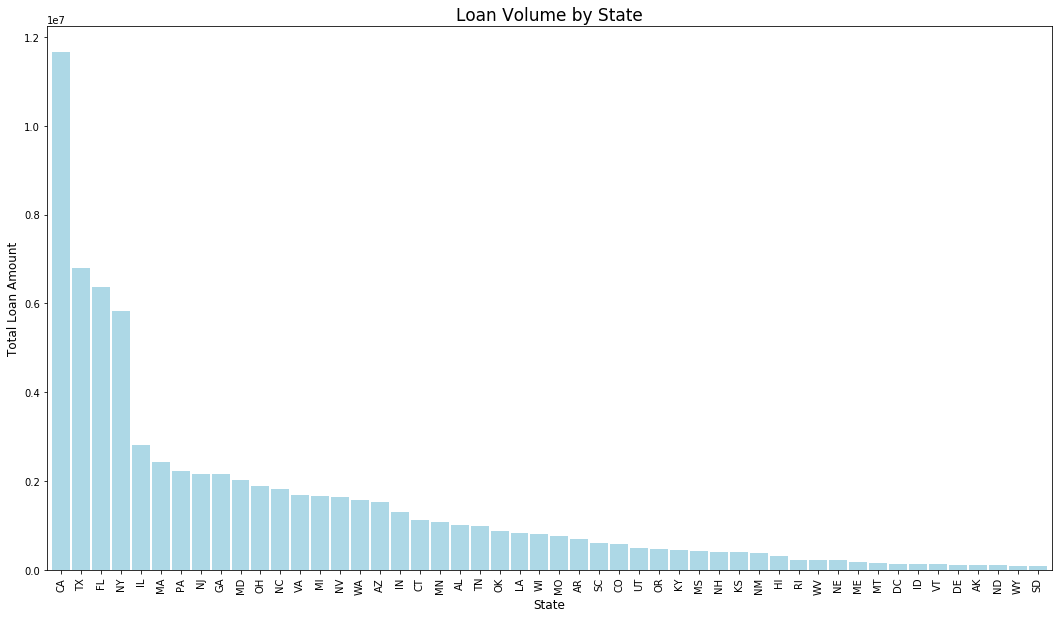

In [172]:
plt.figure(figsize=(18,10))

df_late.groupby(by='addr_state')['loan_amnt'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue', width=0.9)

plt.title('Loan Volume by State', fontsize=17)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Loan Amount', fontsize=12)

plt.savefig('VolumebyState.png');

In [43]:
## Loan Amount by grade - grades C, B, and A are the most common
df.groupby(by='grade')['loan_amnt'].mean().sort_values(ascending=False)

grade
B    17453.822585
A    16581.908687
C    16019.888482
D    15416.210816
Name: loan_amnt, dtype: float64

In [44]:
df['sub_grade'].value_counts(dropna=False) #dropping to avoid multi collinearity

A4    22644
A5    18907
B4    17395
B5    16891
D2    15971
A1    15221
B2    14788
B1    13989
C5    13931
C1    12380
C2    11899
A3    11762
B3    11677
C3    11552
A2    10316
C4     9780
D3     8828
D1     8027
D4     4921
D5     3915
Name: sub_grade, dtype: int64

### Checking for Outliers

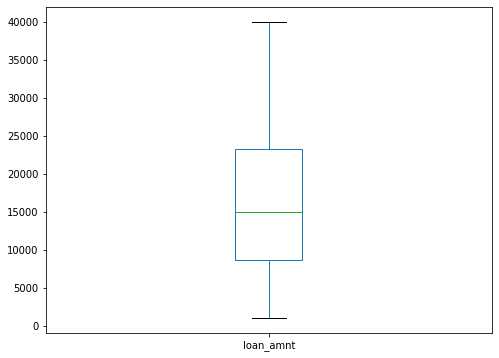

In [45]:
plt.figure(figsize=(8,6))

df['loan_amnt'].plot(kind='box');
plt.savefig("LoanAmount_boxplot.png");

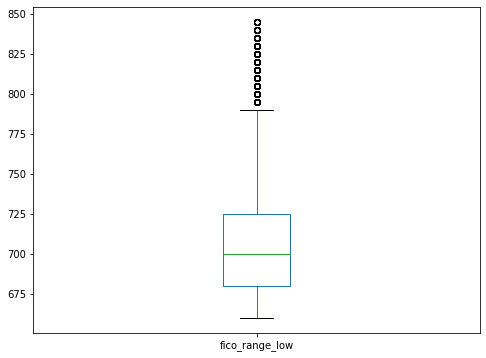

In [97]:
plt.figure(figsize=(8,6))

df['fico_range_low'].plot(kind='box');
plt.savefig("Fico_boxplot.png");

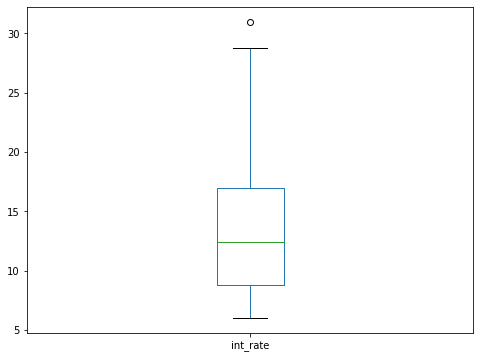

In [109]:
plt.figure(figsize=(8,6))

df['int_rate'].plot(kind='box');
#plt.savefig("Fico_boxplot.png");

In [111]:
df['int_rate'].value_counts().sort_values()

17.30        1
14.71        1
30.99        1
24.55        1
19.95        1
16.08        1
13.33        1
9.56         1
10.19        2
15.57        2
8.46         2
15.40        2
9.02         3
14.02        4
14.74        5
16.40        7
10.81        9
17.19       11
13.90       12
6.00        18
25.00      653
22.50     1325
17.97     1599
20.00     3203
28.80     3913
25.65     4268
18.62     6427
23.05     7502
16.95     9770
7.02     10313
16.12    11549
11.71    11676
7.56     11761
15.24    11894
14.30    12366
20.55    12760
17.74    13920
10.33    13987
11.02    14784
6.46     15219
13.08    16888
12.40    17391
8.81     18898
8.19     22641
Name: int_rate, dtype: int64

There is one loan with an interest rate above 30%, which is unusual for this dataset. The interest looks consistent with grade D, subgrade D5. We will keep this loan in the dataset. If the data does not appear to be entered in error, outliers provide additional insight into the data, and removing them may signify omitting certain information that could be useful for modeling. 

Both missing values and outliers require careful review.

In [115]:
int_over30 = df[df['int_rate'] > 30]
int_over30

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
182464,12000.0,60 months,30.99,395.57,D,D5,1 year,OWN,51344.0,Source Verified,...,0.0,3.0,100.0,0.0,0.0,0.0,246546.0,253829.0,16900.0,216946.0


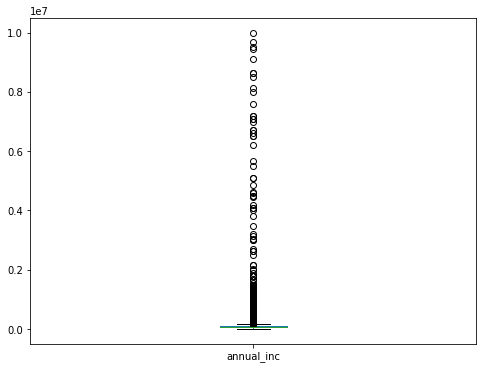

In [116]:
plt.figure(figsize=(8,6))

df['annual_inc'].plot(kind='box');
#plt.savefig("Fico_boxplot.png");

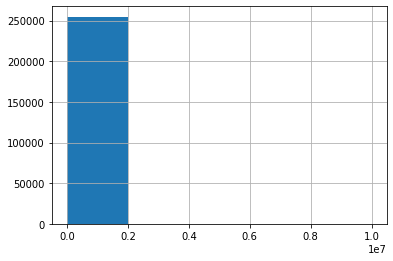

In [123]:
df['annual_inc'].hist(bins=5);

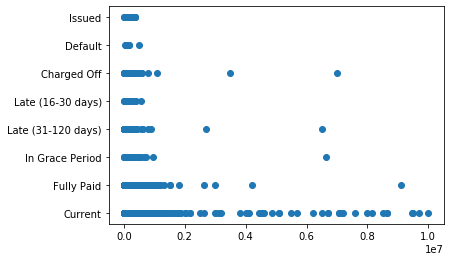

In [127]:
plt.scatter(df['annual_inc'], df['loan_status']);

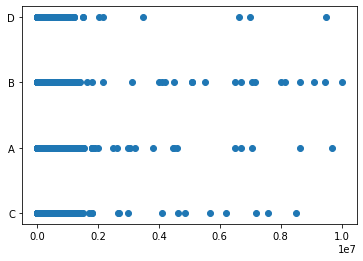

In [126]:
plt.scatter(df['annual_inc'], df['grade']);

In [ ]:
plt.scatter(df['annual_inc'], df['grade']);

#### Column: home_ownership - the subcategory 2 is an outlier

In [47]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    128214
RENT         99534
OWN          27044
ANY              2
Name: home_ownership, dtype: int64

In [48]:
df[df['home_ownership'] == 'ANY']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
21141,15000.0,60 months,23.05,423.29,D,D3,Heat Collision,3 years,ANY,60000.0,...,0.0,4.0,100.0,33.3,0.0,0.0,32552.0,19482.0,6500.0,16052.0
227679,5000.0,36 months,18.62,182.33,D,D1,Do It Outdoors,3 years,ANY,36000.0,...,0.0,2.0,100.0,66.7,0.0,0.0,40061.0,37439.0,5900.0,33161.0


In [49]:
df.drop(df[df['home_ownership'] == 'ANY'].index, inplace=True)

In [50]:
df.shape

(254792, 80)

In [51]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    128214
RENT         99534
OWN          27044
Name: home_ownership, dtype: int64

#### The column emp_title

The emp_title column is not standardized and does not seem to provide sufficient value. If the values were categorized / grouped by industry and position level, that could be helpful. We will likely drop this column due to a wide range of diverse values within it, categorizing which appears to be rather subjective. The initial dataframe included 103,906 unique values within the emp_title column. 

df['emp_title'].nunique() 
103906

df['emp_title'].value_counts(dropna=False)

NaN                                54699
Teacher                             6200
Manager                             5374
Driver                              2881
Registered Nurse                    2715
                                   ...  
Manager trainer                        1
VP Food and Beverage                   1
Building Maintenance Supervisor        1
Lead Medical Tech                      1
Style Attendant                        1
Name: emp_title, Length: 103907, dtype: int64

In [52]:
df['emp_title'].value_counts(dropna=False)

Teacher                             4955
Manager                             4249
Driver                              2344
Registered Nurse                    2245
RN                                  1744
                                    ... 
Research and Development Manager       1
Office Support Assistant               1
Ed clerk                               1
Mason foreman                          1
Lead lab tech                          1
Name: emp_title, Length: 85767, dtype: int64

In [53]:
df['emp_title'].nunique() 

85767

In [54]:
df.drop(columns= 'emp_title', axis=1, inplace=True)

In [55]:
df.shape

(254792, 79)

#### Re-categorization for the Purpose column and one hot encoding

Since the data within the Purpose column is skewed with debt_consolidation accounting for 59% of all transactions, re-categorization would help us produce better modeling results an preserve the informatiom within the Purpose variable.

#df['purpose'].value_counts(dropna=False)<br>
debt_consolidation    139921
credit_card            69395
home_improvement       14959
other                  14062
major_purchase          4493
medical                 2816
car                     2028
house                   1973
vacation                1937
small_business          1640
moving                  1447
renewable_energy         123
Name: purpose, dtype: int64

In [56]:
df['purpose'].value_counts(dropna=False)

debt_consolidation    139919
credit_card            69395
home_improvement       14959
other                  14062
major_purchase          4493
medical                 2816
car                     2028
house                   1973
vacation                1937
small_business          1640
moving                  1447
renewable_energy         123
Name: purpose, dtype: int64

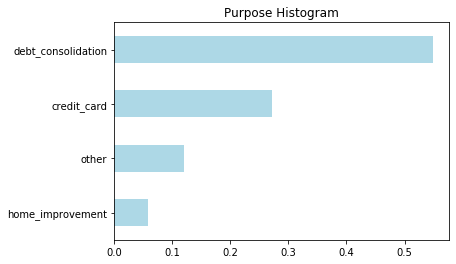

In [163]:
df['purpose'].value_counts(normalize=True).sort_values(ascending=True).plot(kind='barh', color='lightblue')

plt.title('Purpose Histogram')
plt.savefig("Purpose_histogram.png");

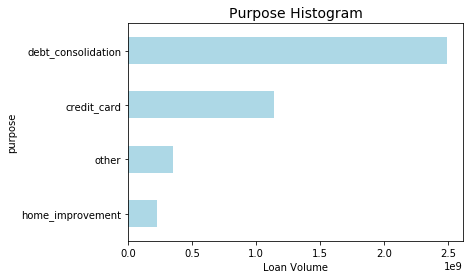

In [168]:
df.groupby(by='purpose')['loan_amnt'].sum().sort_values(ascending=True).plot(kind='barh', color='lightblue');

plt.title('Purpose Histogram', fontsize=14)
plt.xlabel('Loan Volume')
plt.savefig("Purpose_histogram1.png");

In [58]:
def purpose_category(string):
    if "debt_consolidation" in string:
        return 'debt_consolidation'
    elif "credit_card" in string:
        return 'credit_card'
    elif "home_improvement" in string:
        return 'home_improvement'
    else:
        return 'other'
    
df['purpose'] = df['purpose'].map(purpose_category) 

In [59]:
df['purpose'].value_counts()

debt_consolidation    139919
credit_card            69395
other                  30519
home_improvement       14959
Name: purpose, dtype: int64

In [60]:
pd.get_dummies(df[['term', 'purpose', 'addr_state', 'grade', 'home_ownership','verification_status']], drop_first=True).head()

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,addr_state_WI,addr_state_WV,addr_state_WY,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [61]:
df_dummies = pd.get_dummies(df[['term', 'purpose', 'addr_state', 'grade', 'home_ownership', 'verification_status']], drop_first=True) 

In [62]:
df.shape

(254792, 79)

### Volume by State

In [63]:
df['addr_state'].nunique()

50

In [64]:
df.groupby(by='addr_state')['loan_status'].count()

addr_state
AK      539
AL     2886
AR     2035
AZ     6204
CA    33589
CO     3949
CT     4313
DC      504
DE      774
FL    18384
GA     8494
HI     1072
ID      952
IL    10468
IN     4532
KS     2147
KY     2579
LA     2616
MA     6310
MD     6101
ME      901
MI     6688
MN     4426
MO     4235
MS     1655
MT      723
NC     6748
ND      582
NE     1343
NH     1378
NJ     9512
NM     1259
NV     3668
NY    18337
OH     8672
OK     2463
OR     3093
PA     8491
RI     1260
SC     3182
SD      506
TN     4337
TX    22488
UT     1763
VA     6905
VT      651
WA     5451
WI     3594
WV     1498
WY      535
Name: loan_status, dtype: int64

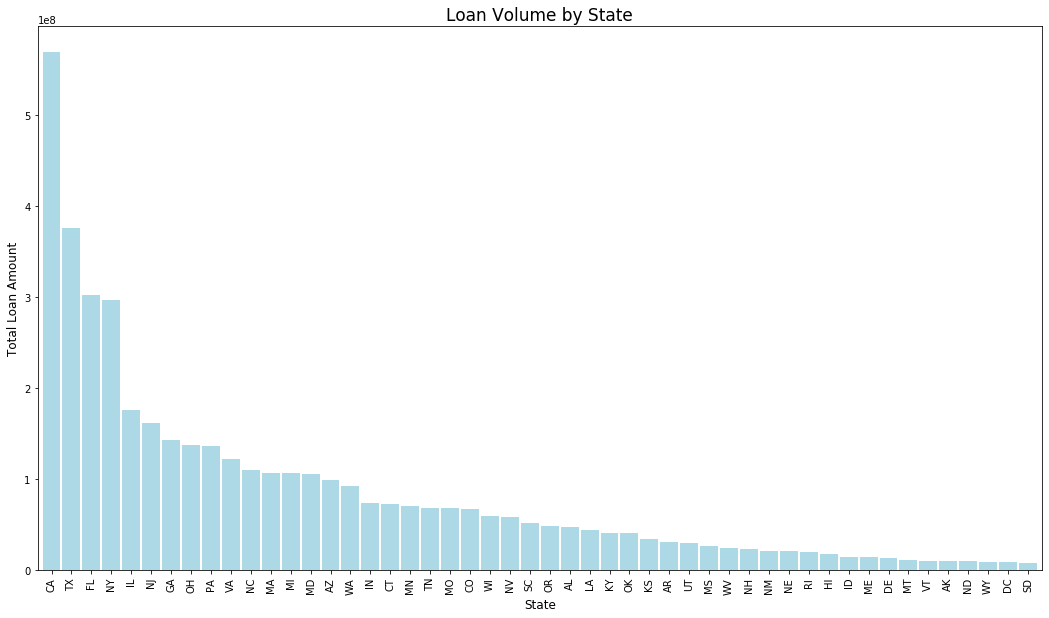

In [105]:
plt.figure(figsize=(18,10))

df.groupby(by='addr_state')['loan_amnt'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue', width=0.9)

plt.title('Loan Volume by State', fontsize=17)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Loan Amount', fontsize=12)

plt.savefig('VolumebyState.png');

In [66]:
df['addr_state'].value_counts(normalize=True) #50 states

CA    0.131829
TX    0.088260
FL    0.072153
NY    0.071969
IL    0.041084
NJ    0.037332
OH    0.034036
GA    0.033337
PA    0.033325
VA    0.027101
NC    0.026484
MI    0.026249
MA    0.024765
AZ    0.024349
MD    0.023945
WA    0.021394
IN    0.017787
MN    0.017371
TN    0.017022
CT    0.016928
MO    0.016621
CO    0.015499
NV    0.014396
WI    0.014106
SC    0.012489
OR    0.012139
AL    0.011327
LA    0.010267
KY    0.010122
OK    0.009667
KS    0.008426
AR    0.007987
UT    0.006919
MS    0.006495
WV    0.005879
NH    0.005408
NE    0.005271
RI    0.004945
NM    0.004941
HI    0.004207
ID    0.003736
ME    0.003536
DE    0.003038
MT    0.002838
VT    0.002555
ND    0.002284
AK    0.002115
WY    0.002100
SD    0.001986
DC    0.001978
Name: addr_state, dtype: float64

In [67]:
df['addr_state'].value_counts(dropna=False) #50 states

CA    33589
TX    22488
FL    18384
NY    18337
IL    10468
NJ     9512
OH     8672
GA     8494
PA     8491
VA     6905
NC     6748
MI     6688
MA     6310
AZ     6204
MD     6101
WA     5451
IN     4532
MN     4426
TN     4337
CT     4313
MO     4235
CO     3949
NV     3668
WI     3594
SC     3182
OR     3093
AL     2886
LA     2616
KY     2579
OK     2463
KS     2147
AR     2035
UT     1763
MS     1655
WV     1498
NH     1378
NE     1343
RI     1260
NM     1259
HI     1072
ID      952
ME      901
DE      774
MT      723
VT      651
ND      582
AK      539
WY      535
SD      506
DC      504
Name: addr_state, dtype: int64

In [68]:
# Checking the max number of columns supported by this number of rows
import math

math.sqrt(254794)

504.77123531358245

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,254792.0,16515.779832,10193.516489,1000.00,8593.75,15000.00,23250.00,40000.00
int_rate,254792.0,13.210855,5.171244,6.00,8.81,12.40,16.95,30.99
installment,254792.0,476.804494,286.262432,30.64,264.13,404.05,642.30,1671.88
annual_inc,254792.0,91208.824620,105625.558492,14.00,54080.00,75000.00,107000.00,9999999.00
dti,254792.0,21.668776,13.326463,0.00,14.40,20.29,27.12,999.00
...,...,...,...,...,...,...,...,...
tax_liens,254792.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
tot_hi_cred_lim,254792.0,214299.190300,197328.232254,1945.00,69289.75,148092.50,308180.00,5070345.00
total_bal_ex_mort,254792.0,65204.471714,59078.889417,52.00,28857.00,48854.50,81682.25,2385357.00
total_bc_limit,254792.0,30782.662007,27813.393198,100.00,12000.00,22900.00,40500.00,788200.00


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254792 entries, 0 to 254793
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   254792 non-null  float64
 1   term                        254792 non-null  object 
 2   int_rate                    254792 non-null  float64
 3   installment                 254792 non-null  float64
 4   grade                       254792 non-null  object 
 5   sub_grade                   254792 non-null  object 
 6   emp_length                  254792 non-null  object 
 7   home_ownership              254792 non-null  object 
 8   annual_inc                  254792 non-null  float64
 9   verification_status         254792 non-null  object 
 10  issue_d                     254792 non-null  object 
 11  loan_status                 254792 non-null  object 
 12  purpose                     254792 non-null  object 
 13  addr_state    

### Loan Status and Loan Purpose

**Loan Status** is the target variable for this dataset, as our goal is to figure out what impacts the loan logevity (if the loan lasts through the end of the term (here: 36 and 60 months), an investor receives all expected income from interest - conversely, if a loan gets paid off early, an investor is receiving their investment early, but missing out on interest - and if a loan falls behind, an investor is at risk of receiving their investor back. 

The lending club structure is such that investor can spread out their moneys across multiple loans (the min amount per Note is 25 dollars), and investors are encouraged to diversify their risk by spreading their investments across many loans/notes.

df['loan_status'].value_counts(dropna=False)<br>
Current               230572
Fully Paid             17935
Late (31-120 days)      2006
Charged Off             1951
In Grace Period         1546
Late (16-30 days)        397
Issued                   365
Default                   22
Name: loan_status, dtype: int64

In [71]:
df['loan_status'].value_counts(dropna=False)

Current               230570
Fully Paid             17935
Late (31-120 days)      2006
Charged Off             1951
In Grace Period         1546
Late (16-30 days)        397
Issued                   365
Default                   22
Name: loan_status, dtype: int64

In [91]:
#Loan_status vs purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("white", as_cmap=True)
(round(pd.crosstab(df[purp_loan[0]], df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,
credit_card,21.780000,27.670000,31.820000,22.690000,24.510000,27.120000,26.700000,25.170000
debt_consolidation,57.000000,54.990000,50.000000,52.930000,60.160000,60.550000,54.660000,56.830000
home_improvement,5.840000,5.780000,0.000000,7.380000,4.980000,3.010000,5.040000,4.690000
other,15.380000,11.560000,18.180000,17.000000,10.350000,9.320000,13.600000,13.310000


In [72]:
## Find the mean loan amount for loans with 0 and 1 status (Current status of the loan)
df.groupby(by='loan_status')['loan_amnt'].mean()

loan_status
Charged Off           16631.714505
Current               16694.019387
Default               16550.000000
Fully Paid            14040.557569
In Grace Period       17788.567270
Issued                20069.520548
Late (16-30 days)     16106.989924
Late (31-120 days)    16499.289631
Name: loan_amnt, dtype: float64

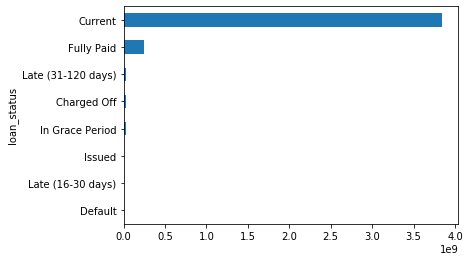

In [162]:
df.groupby(by='loan_status')['loan_amnt'].sum().sort_values(ascending=True).plot(kind='barh')

In [74]:
## Loan Status vs Fico score
df.groupby(by='loan_status')['fico_range_low'].mean()

loan_status
Charged Off           700.023065
Current               705.904324
Default               697.045455
Fully Paid            711.758851
In Grace Period       697.390039
Issued                702.835616
Late (16-30 days)     698.790932
Late (31-120 days)    696.493021
Name: fico_range_low, dtype: float64

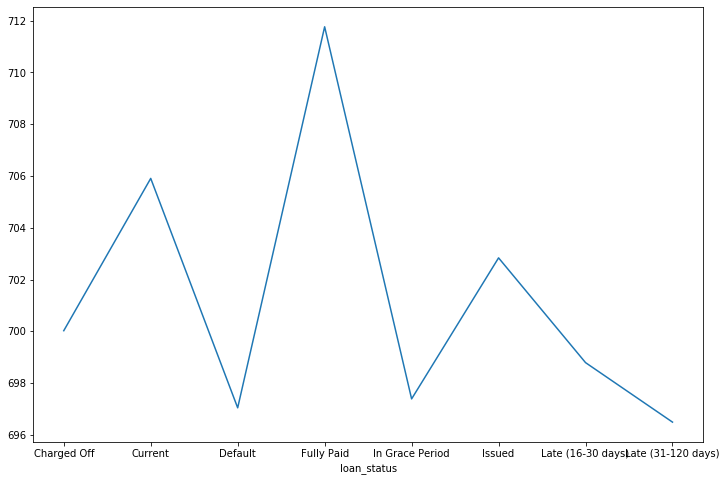

In [75]:
## Loan Status vs Fico score
plt.figure(figsize=(12, 8))

df.groupby(by='loan_status')['fico_range_low'].mean().plot()

<Figure size 864x720 with 0 Axes>

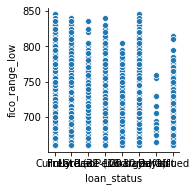

In [76]:
plt.figure(figsize=(12, 10))

sns.pairplot(df, x_vars=['loan_status'], y_vars=['fico_range_low']);

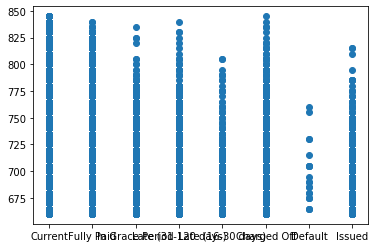

In [77]:
plt.scatter(df['loan_status'], df['fico_range_low'])

### Loan grade and Loan Amount, Income, and Interest rate

In [78]:
df['loan_amnt'].mean()

16515.779832176835

In [79]:
df['int_rate'].mean()

13.210854971907393

In [80]:
## Loan grade by mean Income
df.groupby(by='grade')['annual_inc'].mean().sort_values(ascending=False)

grade
A    98059.957687
B    92255.648658
C    85662.871115
D    84290.094248
Name: annual_inc, dtype: float64

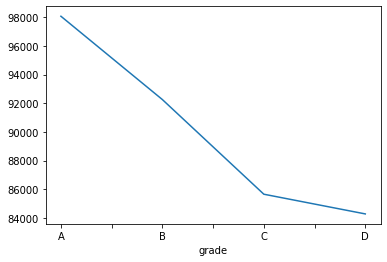

In [81]:
## Loan grade by mean Income
df.groupby(by='grade')['annual_inc'].mean().sort_values(ascending=False).plot();

In [82]:
## Loan Amount by grade - grades C, B, and A are the most common
df.groupby(by='grade')['loan_amnt'].sum().sort_values(ascending=False)

grade
A    1.307484e+09
B    1.304499e+09
C    9.538562e+08
D    6.422502e+08
Name: loan_amnt, dtype: float64

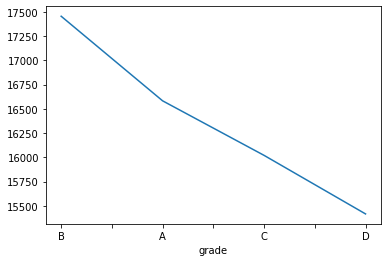

In [83]:
##Loan grade by mean Loan Amount
df.groupby(by='grade')['loan_amnt'].mean().sort_values(ascending=False).plot()

In [84]:
## FICO rate by grade
df.groupby(by='grade')['fico_range_low'].mean().sort_values(ascending=False)

grade
A    724.702663
B    708.888815
C    692.384451
D    685.669947
Name: fico_range_low, dtype: float64

In [85]:
def view_dist (df, column):
    return (plt.figure(figsize= (8,6)), 
            sns.distplot(df[column],kde = True, color='blue'), 
            plt.title(f'Distribution of {column}'))

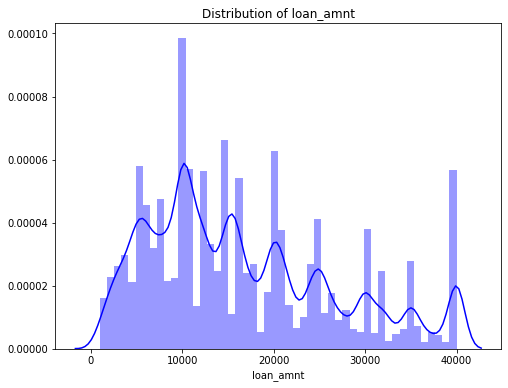

In [86]:
view_dist(df, 'loan_amnt');

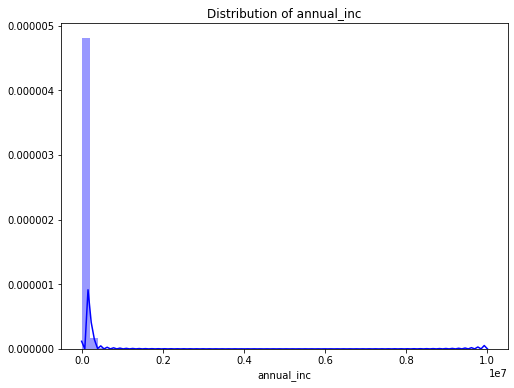

In [122]:
view_dist(df, 'annual_inc');

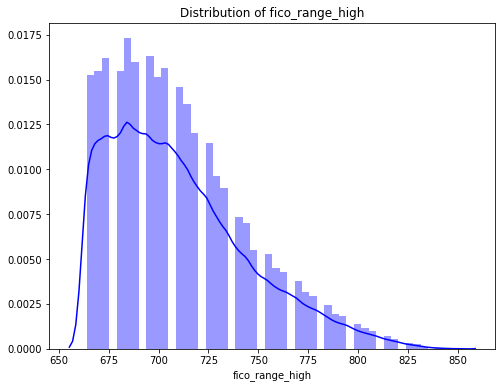

In [87]:
view_dist(df, 'fico_range_high');

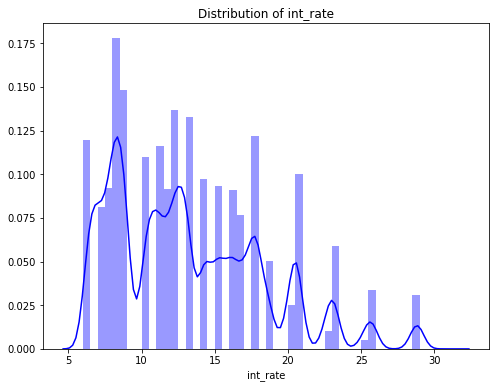

In [88]:
view_dist(df, 'int_rate');

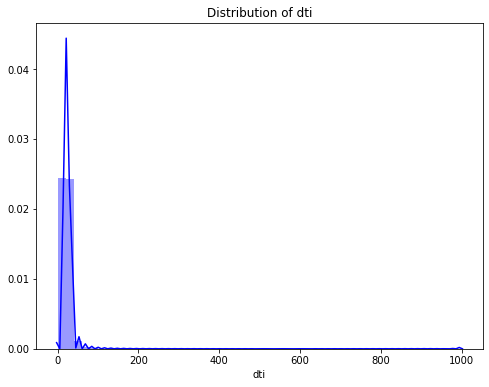

In [89]:
view_dist(df, 'dti');

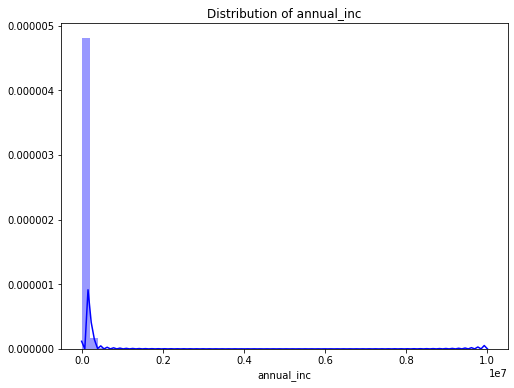

In [90]:
view_dist(df, 'annual_inc');

### Exploring Fico and Purpose

In [92]:
## FICO rate by grade
df.groupby(by='grade')['fico_range_low'].mean().sort_values(ascending=False)

grade
A    724.702663
B    708.888815
C    692.384451
D    685.669947
Name: fico_range_low, dtype: float64

In [93]:
## FICO rate by grade
df.groupby(by='purpose')['fico_range_low'].mean().sort_values(ascending=False)

purpose
home_improvement      716.857745
other                 711.918805
debt_consolidation    706.026308
credit_card           701.478493
Name: fico_range_low, dtype: float64

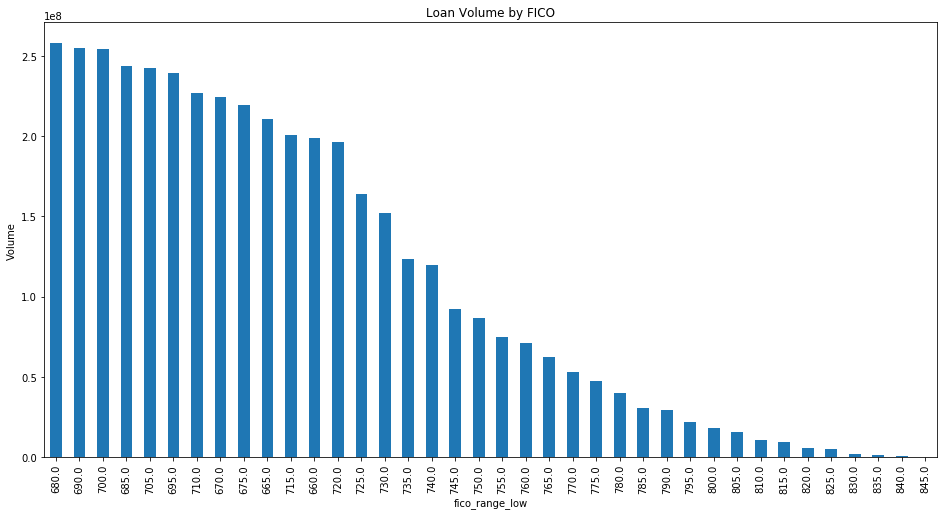

In [104]:
## FICO and Loan Amount
plt.figure(figsize=(16,8))
plt.title('Loan Volume by FICO')
plt.ylabel('Volume')
df.groupby(by='fico_range_low')['loan_amnt'].sum().sort_values(ascending=False).plot(kind='bar')

plt.savefig('LoanVolumeByFico.png');

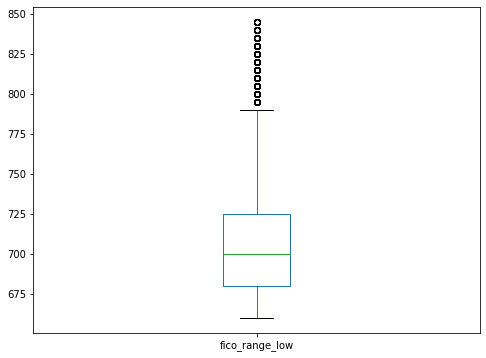

In [103]:
plt.figure(figsize=(8,6))

df['fico_range_low'].plot(kind='box');

plt.savefig("Fico_boxplot.png");

In [108]:
df['fico_range_low'].value_counts()

680.0    16397
690.0    15444
670.0    15356
685.0    15166
700.0    14853
665.0    14692
675.0    14648
660.0    14443
695.0    14352
705.0    13826
710.0    12936
715.0    11417
720.0    10863
725.0     9126
730.0     8492
735.0     6977
740.0     6625
745.0     5238
750.0     4989
755.0     4256
760.0     4055
765.0     3587
770.0     3006
775.0     2790
780.0     2326
785.0     1845
790.0     1743
795.0     1304
800.0     1106
805.0      922
810.0      655
815.0      540
820.0      327
825.0      263
830.0      118
835.0       62
840.0       32
845.0       15
Name: fico_range_low, dtype: int64

In [95]:
#Loan_status vs Fico
fico_loan= ['fico_range_low', 'loan_status']
cm = sns.light_palette('white', as_cmap=True)
(round(pd.crosstab(df[fico_loan[0]], df[fico_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
fico_range_low,,,,,,,,
660.0,7.790000,5.680000,0.000000,4.850000,7.500000,7.670000,8.310000,7.380000
665.0,7.480000,5.770000,13.640000,5.000000,8.410000,6.850000,7.560000,8.280000
670.0,7.280000,6.080000,0.000000,4.980000,7.570000,3.840000,7.300000,7.480000
675.0,6.710000,5.790000,13.640000,4.970000,6.600000,5.480000,4.530000,6.930000
680.0,7.480000,6.460000,9.090000,5.690000,7.890000,7.400000,8.060000,7.830000
685.0,6.050000,6.000000,9.090000,5.110000,5.820000,7.400000,6.550000,7.130000
690.0,6.460000,6.090000,9.090000,5.480000,6.660000,6.030000,6.300000,7.330000
695.0,5.480000,5.640000,4.550000,5.320000,6.600000,6.300000,6.550000,6.630000
700.0,6.560000,5.830000,0.000000,5.620000,6.730000,7.400000,6.050000,6.080000


### Historgram of all numerics

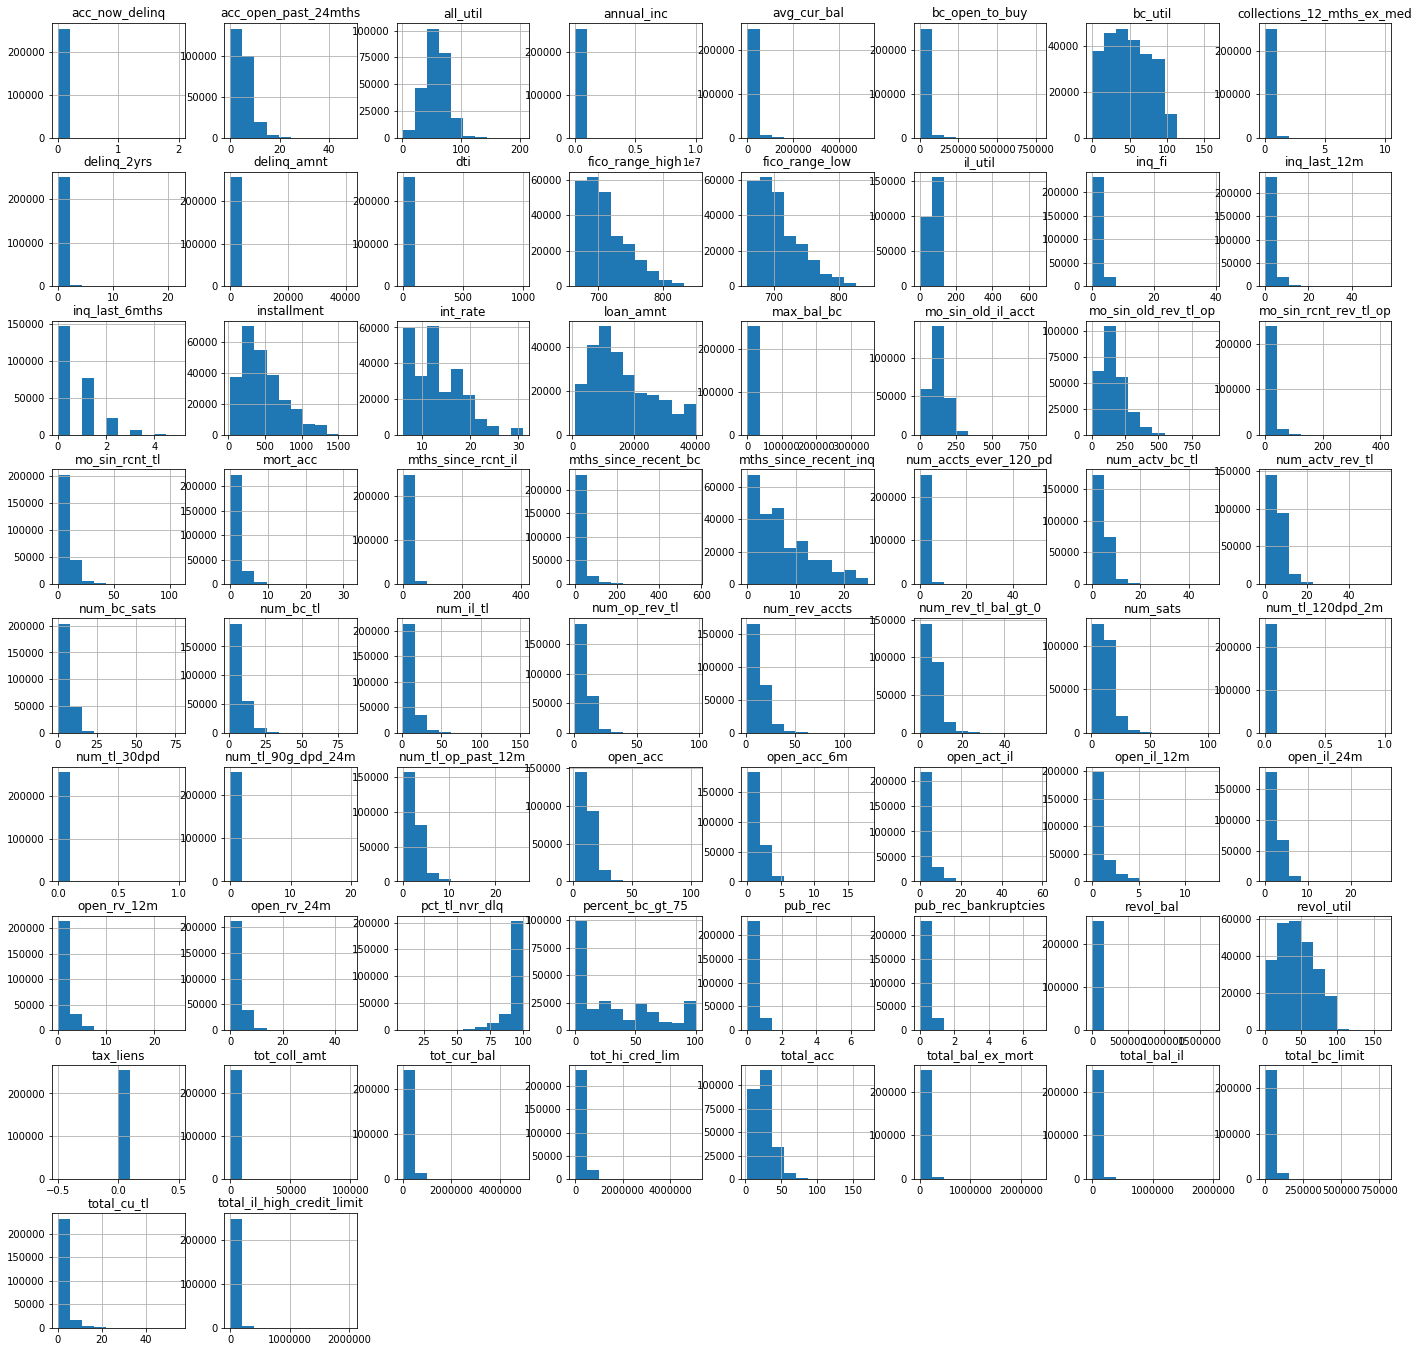

In [96]:
df.hist(figsize=(24,24));  

### Heatmap of all correlations

This heatmap helps us idenitfy potenital Multicollinearity within variables.

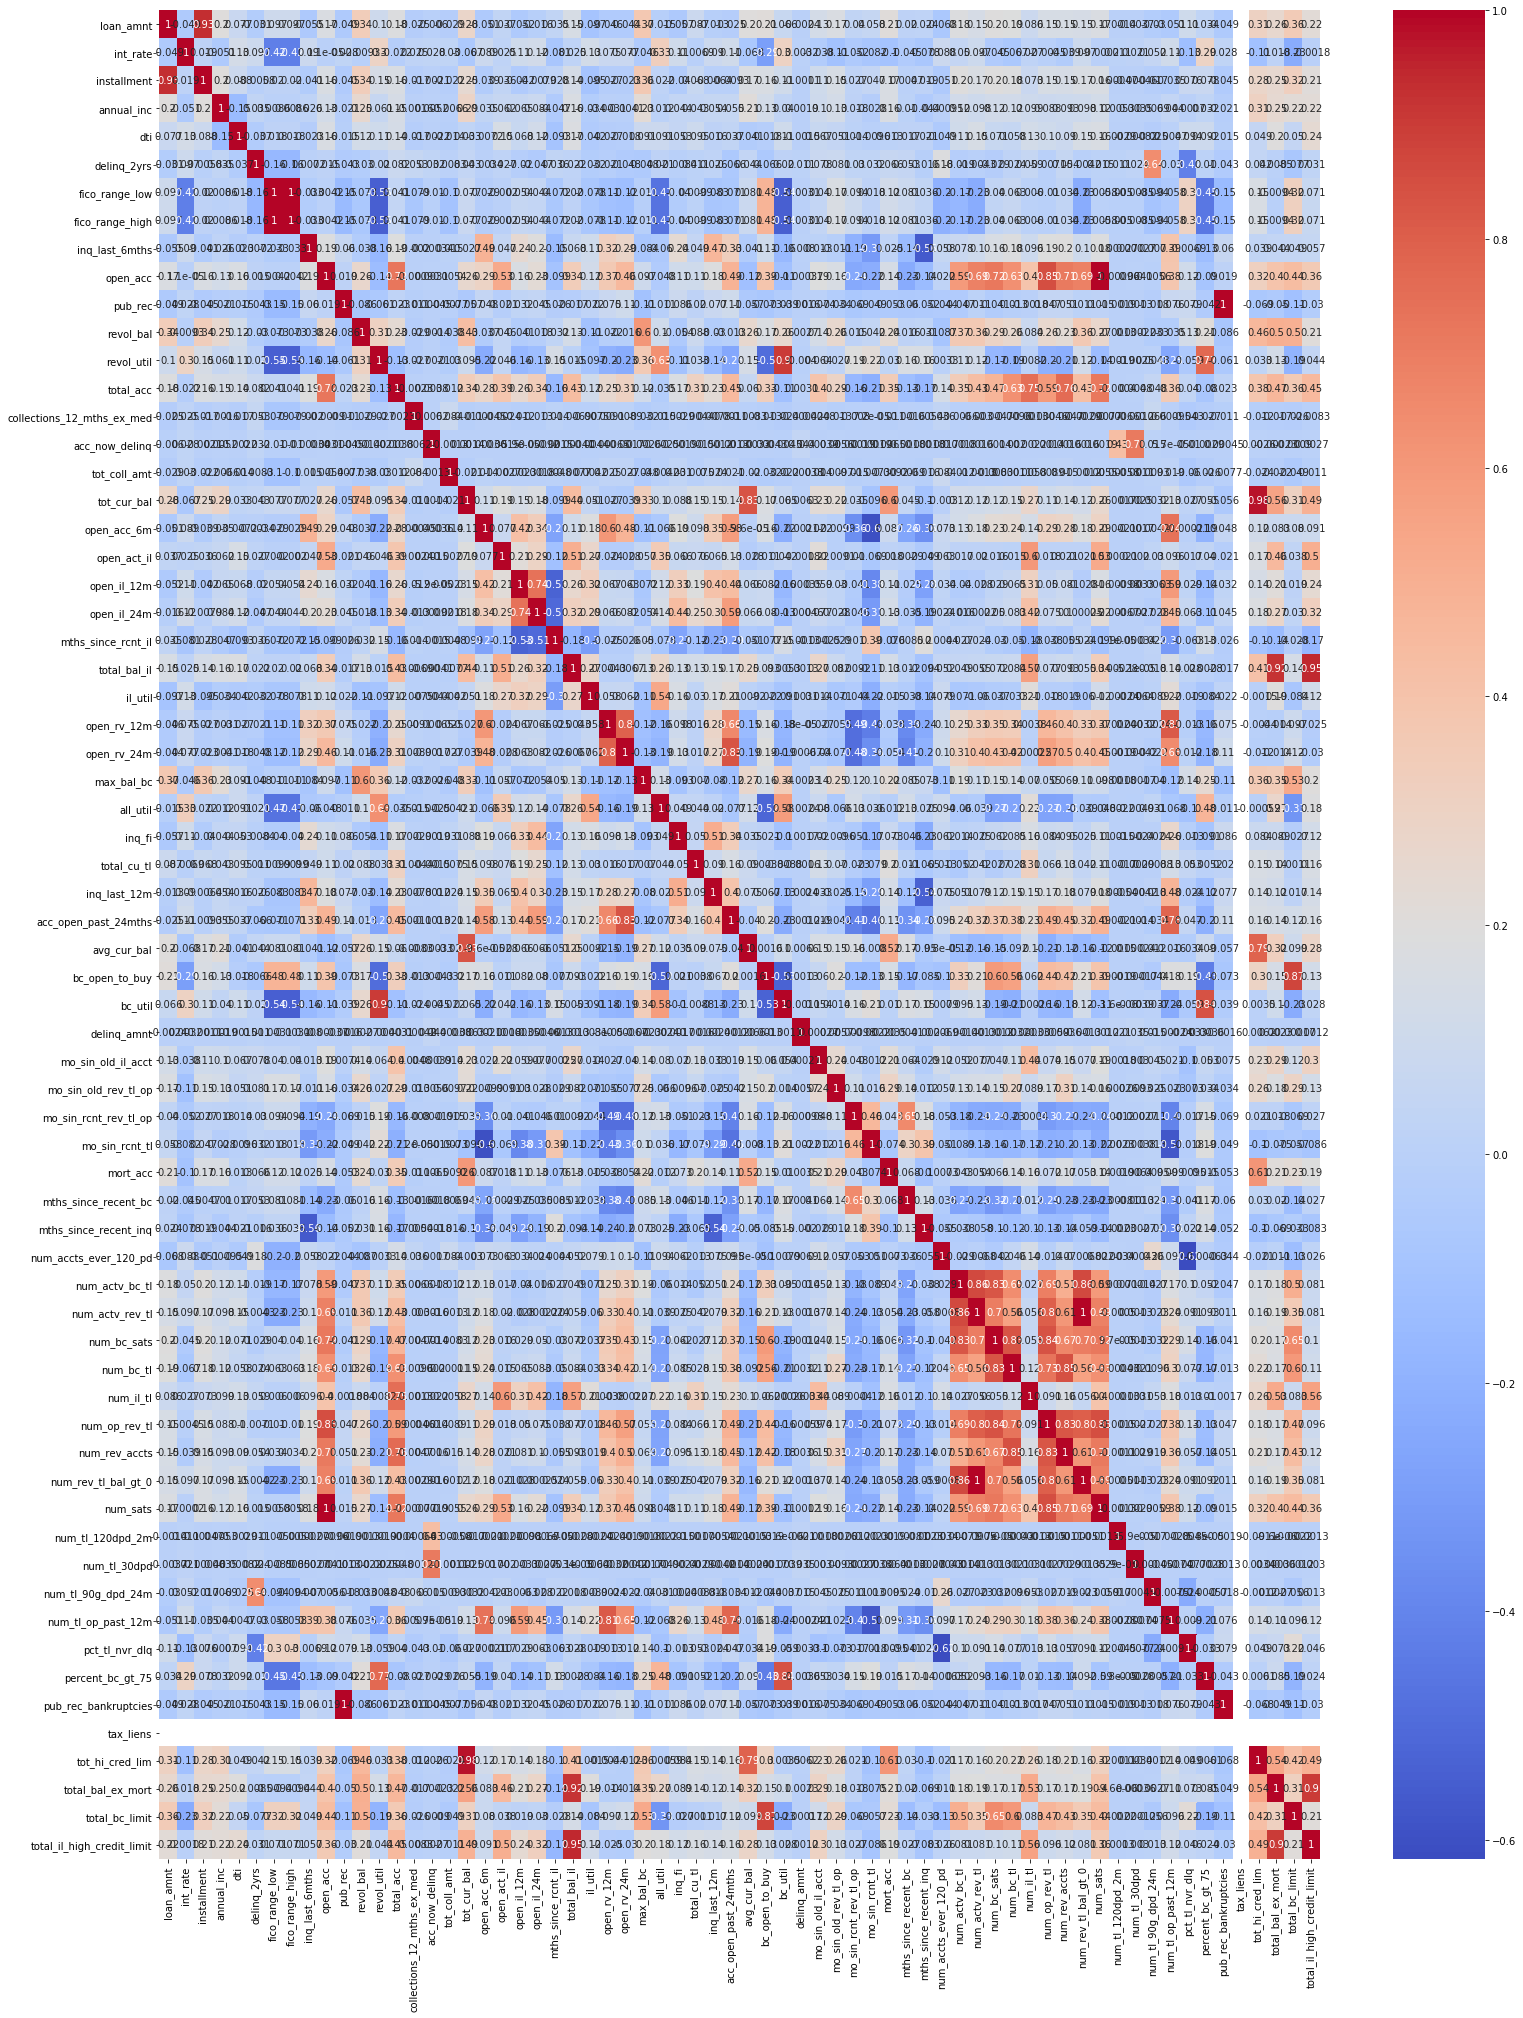

In [132]:
plt.subplots(figsize=(26,34))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True);